# 泰坦尼克号生还者数据分析

### 数据集简介

数据表包含了近千条泰坦尼克号的乘客信息。罗列了各个乘客的性别、年龄、票面级别、船舱级别、登船位置和最后的生还情况等

接下来将利用这些数据，尝试从年龄、性别等方面去分析这些因素和生存率之间的联系

### 提出问题

1. 男女乘客之间生存率的差异如何？
2. 乘客的票面级别对生存率是否有影响？
3. 乘客的年龄分布如何？各年龄阶段的乘客的生存率是怎样的？

### 数据处理和分析过程

1. 检查数据的完整性，尤其是年龄、性别和票面级别，并对数据进行清理
    - 发现2条 Embarked 值缺失的记录，但是因为不影响相关问题的分析，所以不做处理
    - 有些乘客的年龄数据缺失，这在分析和年龄相关的问题的时候会有影响；所以建立数据集 valid_age_df 来移除整个数据集中年龄缺失的记录
2. 单一从性别和票面级别因素上了解对生存率的影响
3. 从票面级别和性别两个因素共同分析对生存率的影响
4. 各年龄段

### 结论

通过对乘客数据的简单探索，我有以下几个发现：

1. 7成以上的妇女得以逃生，而少于2成的男性得以逃身，总体来说，妇女幸存的概率要高于男性，这预示着性别和生存率的相关性较大
2. 头等舱的乘客逃生的几率达到6成，而三等舱的乘客逃生的几率只有2成，这可能由于头等舱乘客有优先权利乘坐逃生艇，但差别不算特别的大
3. 三等舱乘客中妇女逃生率远比不上一二等舱妇女，预示着船舱等级是和生存率大小相关的因素
4. 20-40岁的乘客占大多数；儿童(8岁以下)生存率高，年长者(50岁以上)生存率低，预示着年龄和生存率的相关性，年纪小的儿童比老人更可能幸存

### 参考文献

1. https://www.kaggle.com/c/titanic/data
2. http://www.dailymail.co.uk/sciencetech/article-1254788/Why-women-children-saved-Titanic-Lusitania.html
3. https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe
4. https://stackoverflow.com/questions/38174155/group-dataframe-and-get-sum-and-count
5. https://stackoverflow.com/questions/18504967/pandas-dataframe-create-new-columns-and-fill-with-calculated-values-from-same-df


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

#### 从 CSV 文件中读取数据，并检查数据行数 (即乘客数)

In [95]:
df = pd.read_csv('titanic-data.csv')

# check how many passengers are there

passenger_count = len(df.index)
print(passenger_count)

891


#### 对数据的完整性进行检查

In [96]:
# check if some columns has empty data

df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [97]:
df.loc[~df['Embarked'].isin(['S','C','Q'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [98]:
df.loc[pd.isnull(df['Age'])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


#### 检查下来的结果

1. 有两条记录缺少乘船地点，但不影响到所提出来的问题的分析，将其保留并不做处理
2. 有些年龄数据丢失，在分析和年龄相关的数据的时候，剔除这部分的数据。因为无法了解到这部分数据中的年龄分布情况，可能对年龄相关问题的分析造成一定的影响

#### 将剔除异常年龄数据后的数据点保存到新的 DataFrame 当中

In [99]:
df2 = df.loc[pd.notnull(df['Age'])].copy()

#### 分析年龄因素和生存率的相关性

In [100]:
df2['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

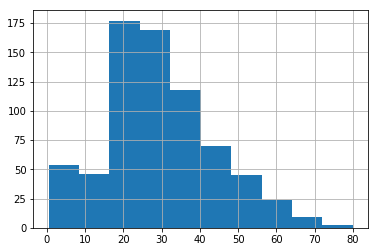

In [106]:
df2['Age'].hist()
plt.show()

In [102]:
bins = np.arange(0, 90, 10)
df2['age_range'] = pd.cut(df['Age'], bins)

df2.groupby('age_range')['Survived'].mean()

age_range
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64

#### 得到的结论

1. 乘客年龄在20-40岁之间是最多的
2. 年龄在0-10岁范围内的乘客的生存率最高，有将近6成的生还率
3. 年龄在70-80岁范围内的乘客的生存率最低，只有2成左右的生还率

In [103]:
pclass_serial = df.groupby(['Pclass'])['Survived'].mean()
pclass_serial

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

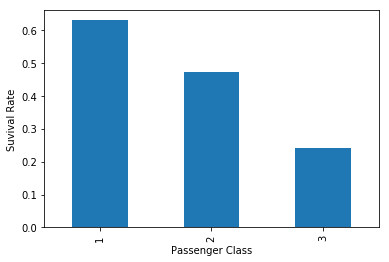

In [104]:
pclass_serial_plt = pclass_serial.plot(kind='bar')
pclass_serial_plt.set_xlabel('Passenger Class')
pclass_serial_plt.set_ylabel('Suvival Rate')
plt.show()

the above bar chart shows that the 3rd class passengers had a less chance to survive compared to those in 1st class and 2nd class

In [105]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

#### 得到的结论

1. 一等舱乘客的生存率远高于三等舱的乘客
2. 女性的生存率要高于男性，尤其在一、二等舱的乘客中更是如此